##### Importamos las librerías y extraemos los datos del excel para quedarnos con varios dataframes desde donde vamos a trabajar

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data = r"Datos Sentadilla Frontal.xlsx"
df1 = pd.read_excel(data, sheet_name= "Sheet1")
df2 = pd.read_excel(data, sheet_name= "Sheet2")

##### Empezamos con la visualización de datos

La primera gráfica va a ser la evolución del RM a lo largo del tiempo

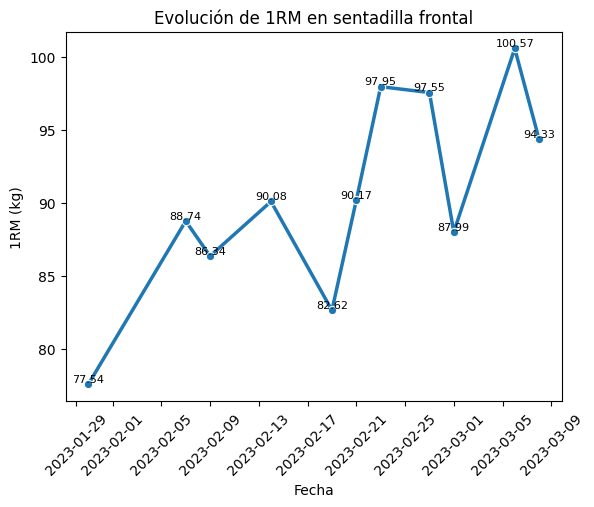

In [3]:
df_fecha_maxRM = df1.groupby("Fecha")["1RM (kg)"].max().reset_index()
sns.lineplot(data = df_fecha_maxRM, x = "Fecha", y = "1RM (kg)", linewidth= 2.5, marker= "o")
for i in range(len(df_fecha_maxRM["1RM (kg)"])):
    plt.annotate(df_fecha_maxRM["1RM (kg)"][i], (df_fecha_maxRM["Fecha"][i], df_fecha_maxRM["1RM (kg)"][i]), ha= "center", va= "bottom", fontsize= 8)
plt.title("Evolución de 1RM en sentadilla frontal")
plt.xticks(rotation= 45)
plt.show()

La segunda gráfica que quiero obtener es ver cómo ha evolucionado la intensidad y el volumen a lo largo del programa

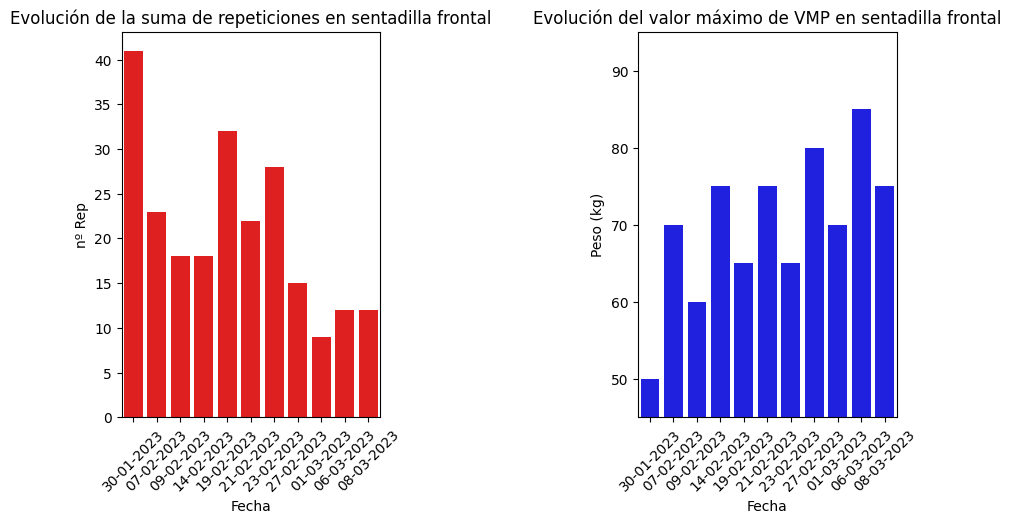

In [9]:
df_sumreps_VMPmax_fecha = df1.groupby("Fecha").agg({"nº Rep" : "sum", "Peso (kg)": "max"}).reset_index()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=1)
sns.set_palette("Set2")
sns.barplot(data=df_sumreps_VMPmax_fecha, x="Fecha", y="nº Rep", color="red", ax=ax[0])
ax[0].set_xticklabels([datetime.datetime.strftime(date, "%d-%m-%Y") for date in df_sumreps_VMPmax_fecha["Fecha"]], rotation=45)
ax[0].set_title("Evolución de la suma de repeticiones en sentadilla frontal")
sns.barplot(data=df_sumreps_VMPmax_fecha, x="Fecha", y="Peso (kg)", color="blue", ax=ax[1])
ax[1].set_xticklabels([datetime.datetime.strftime(date, "%d-%m-%Y") for date in df_sumreps_VMPmax_fecha["Fecha"]], rotation=45)
ax[1].set_title("Evolución del valor máximo de VMP en sentadilla frontal")
ax[1].set_ylim(45,95)
plt.show()



Graficar tabla de fatiga generada a lo largo de los entrenos que está situada en la Sheet2

Graficar tabla de VMP max con máximo peso por fecha que está en la Sheet3